In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import os
from glob import glob
import subprocess
import shutil
import traceback
import random
import pickle

import joblib
from concurrent.futures import ProcessPoolExecutor

from backports import tempfile

import matplotlib
matplotlib.rcParams['savefig.dpi'] = 144
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import psrchive

import pipe

In [3]:
par_db = pipe.par_db

In [4]:
#d = "/psr_archive/hessels/archibald/0337+17/raw/WSRT/07Feb2013/J0337+1715-1380"
#d = "/psr_archive/hessels/archibald/0337+17/raw/WSRT/11Apr2012/J0337+1715-1380"
d = "/psr_archive/hessels/archibald/0337+17/raw/WSRT/16Jun2012/J0337+1715-1380"

pipe.clear_wsrt_day(d, success=False, failure=True)
pipe.process_wsrt_day(d, "/tmp/wsrt_problem_4")

ERROR:root:failure processing /psr_archive/hessels/archibald/0337+17/raw/WSRT/16Jun2012/J0337+1715-1380: cannot open '/tmp/wsrt_problem_4/Band0.tadd.align.ar' - No such file or directory


RuntimeError: cannot open '/tmp/wsrt_problem_4/Band0.tadd.align.ar' - No such file or directory

0.00223667429236
(360, 128)
(360, 128)


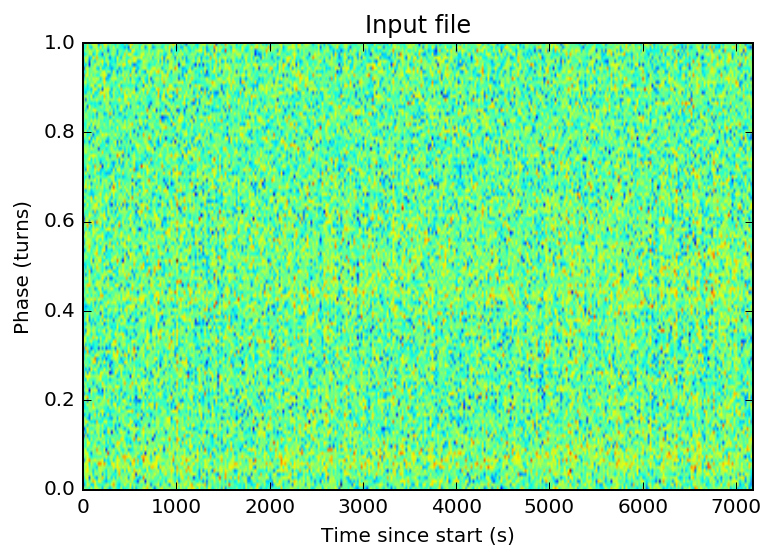

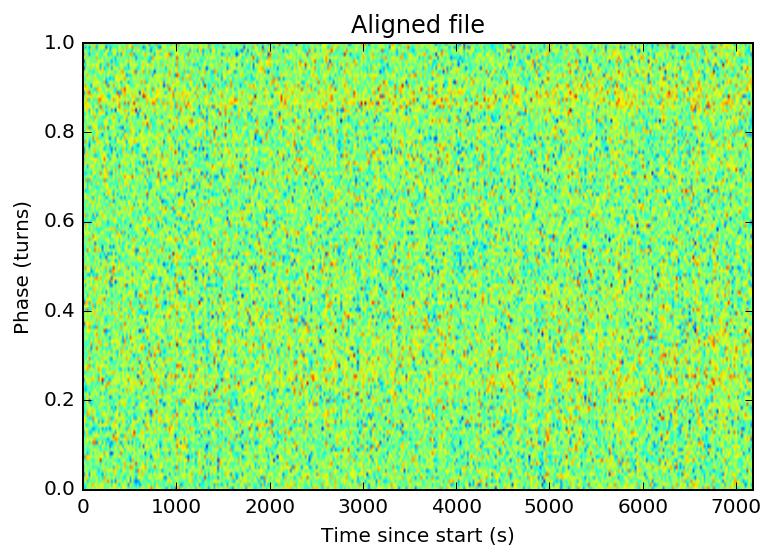

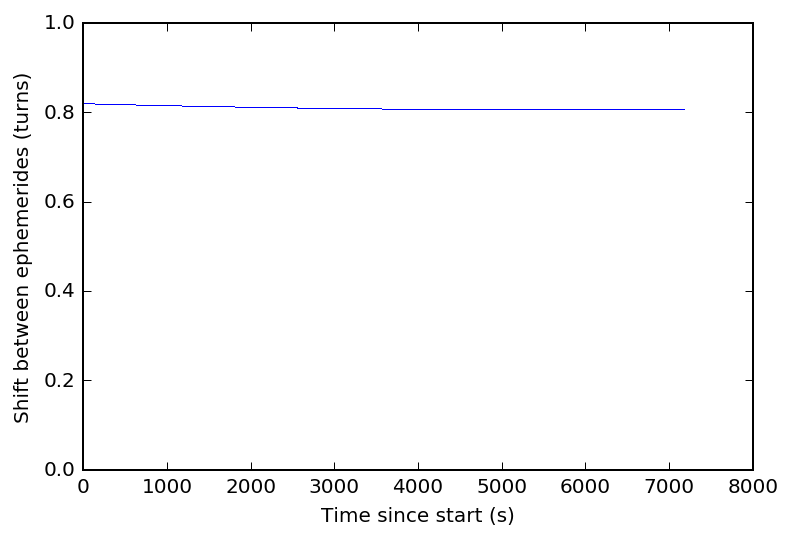

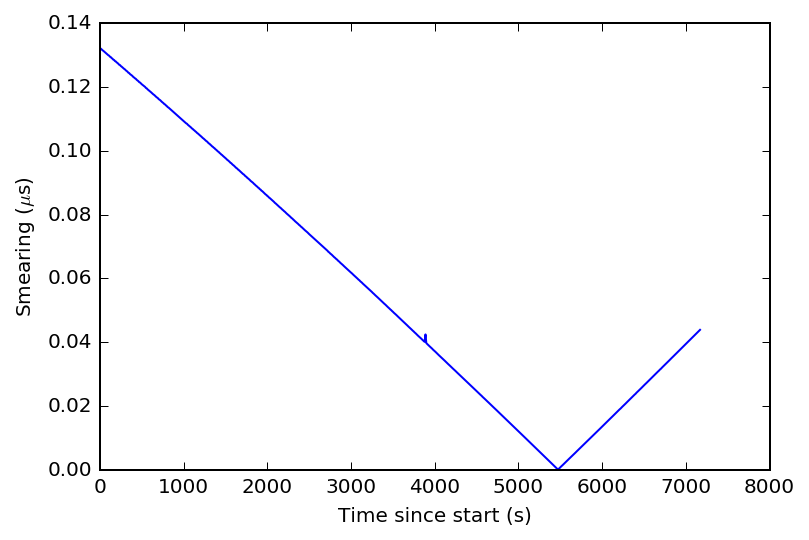

In [10]:
inf = "/tmp/wsrt_problem/Band4.tadd.ar"
outf = "/tmp/wsrt_problem/Band4.tadd.align"
F = psrchive.Archive_load(inf)
mjd = (F.get_Integration(0).get_start_time().in_days()
    +F.get_Integration(len(F)-1).get_end_time().in_days())/2
par = par_db.get_par_for(mjd)
pipe.check_call(["pam", "-E", par, "-e", "align", inf])
G = psrchive.Archive_load(outf)

I = F.get_Integration(0)
J = G.get_Integration(0)

print (J.get_epoch()-I.get_epoch()).in_days()*86400

P = I.get_folding_period()
deltas = []
ts = []
mjd0 = None 
for i in range(len(F)):
    if mjd0 is None:
        mjd0 = F.get_Integration(i).get_epoch().in_days()
    t = F.get_Integration(i).get_epoch().in_days() - mjd0
    d = (G.get_Integration(i).get_epoch()-F.get_Integration(i).get_epoch()).in_days()*86400
    deltas.append(d/P)
    ts.append(t)
deltas = np.array(deltas)
ts = np.array(ts)

F.pscrunch()
F.fscrunch()
F.bscrunch(4)
F.tscrunch(4)
F.remove_baseline()
d = np.squeeze(F.get_data())
print d.shape
plt.imshow(d.T, extent=(86400*ts[0],86400*ts[-1],0,1))
plt.gca().set_aspect('auto')
plt.xlabel("Time since start (s)")
plt.ylabel("Phase (turns)")
plt.title("Input file")

plt.figure()
G.pscrunch()
G.fscrunch()
G.bscrunch(4)
G.tscrunch(2)
G.remove_baseline()
d = np.squeeze(G.get_data())
print d.shape
plt.imshow(d.T, extent=(86400*ts[0],86400*ts[-1],0,1))
plt.gca().set_aspect('auto')
plt.xlabel("Time since start (s)")
plt.ylabel("Phase (turns)")
plt.title("Aligned file")


plt.figure()
plt.plot(86400*ts, deltas, ",")
plt.xlabel("Time since start (s)")
plt.ylabel("Shift between ephemerides (turns)")
plt.ylim(0,1)

plt.figure()
smear = np.diff(deltas)
smear = P*np.abs((smear+0.5) % 1 - 0.5)
plt.plot(86400*ts[:-1], 1e6*smear)
plt.ylim(ymin=0)
plt.xlabel("Time since start (s)")
plt.ylabel("Smearing ($\mu$s)")

In [ ]:
E = F.get_ephemeris()

In [ ]:
P = I.get_folding_period()

In [ ]:
F.get_centre_frequency()

In [ ]:
F.

In [11]:
F = psrchive.Archive_load("/tmp/wsrt_problem/Band4.tadd.ar")

In [13]:
F.get_telescope()

'i'

In [14]:
G = psrchive.Archive_load("/psr_archive/hessels/archibald/0337+17/raw/AO/puppi_56554_J0337+1715_0223_0001.fits")

In [15]:
G.get_telescope()

'Arecibo'

In [16]:
H = psrchive.Archive_load("/psr_archive/hessels/archibald/0337+17/raw/GBT/guppi_56050_0337+17_0008.forTOAs")
H.get_telescope()

'GBT'

In [17]:
H.get_nsubint()

59

In [21]:
I = H.get_first_Integration()

In [22]:
I.get_telescope_zenith()

47.73960876464843